In [1]:
import funclib as flib

Parameters

In [23]:
E = 5/3e9
mu_m_space = [6.81509470e-10, 1.09717678e-09, 1.51284409e-09, 1.92851141e-09,
              2.34417872e-09, 2.75984603e-09, 3.17551334e-09, 3.59118066e-09, 
              4.00684797e-09, 4.42251528e-09]
Gs = list(np.linspace(0.6, 1, 1000)) + list(np.linspace(1, 35, 1000))

Predict yearly substitution rates

In [24]:
results_l = []
for mu_m in mu_m_space:
    for G in Gs:
        y_rate = flib.predict_yearly_rate(E, mu_m/4, mu_m, G, G)
        results_l.append([mu_m, G, y_rate])
        
results_df = pd.DataFrame(results_l)
results_df.columns = ["mu_m","G","y_rate"]
results_df["log_G"] = np.log10(results_df.G)

Get generation times per species from Table S1

In [25]:
t1 = pd.read_csv("../../data/Table_S1_ee5.csv")
subd = t1[t1.Group=="Mammals"]

Plot

/Users/marc/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


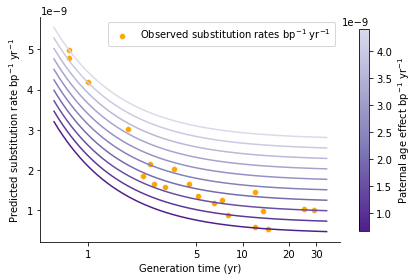

In [28]:
f,ax = plt.subplots()

# Colormap
cmap = plt.get_cmap('Purples_r')
new_cmap = flib.truncate_colormap(cmap, 0.1, 0.75)

# Scatter and lines
sns.lineplot(data=results_df, x="log_G", y="y_rate", hue="mu_m",
             palette=new_cmap,ax=ax,legend=False)
sns.scatterplot(np.log10(subd.Generation_time_y), subd.MutPerYearUCSC/1e6,
                color="orange", label="Observed substitution rates bp$^{-1}$ yr$^{-1}$")

# Axes styling
label_Gs = [1,5,10,20,30]
xlabels = [1,5,10,20,30]
log10_Gs = np.log10(label_Gs)

ax.set_xticks(log10_Gs)
ax.set_xticklabels(xlabels)
ax.set_xlabel(r"Generation time (yr)")
ax.set_ylabel(r"Predicted substitution rate bp$^{-1}$ yr$^{-1}$")

# Color bar
n_partitions = 10
toy_points = ax.scatter([1]*n_partitions, mu_m_space, c=mu_m_space, cmap=new_cmap,s=0) 
cbar = plt.colorbar(toy_points, ax=ax, shrink=0.9)
cbar.set_label(r"Paternal age effect bp$^{-1}$ yr$^{-1}$")

sns.despine()
plt.tight_layout()

#plt.savefig("../pdfs/Figure_SX_yearly_rates_prediction.pdf")